In [3]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (380/380), done.


In [4]:
%cd segment-anything-2
!pip install -e .

/content/segment-anything-2
Obtaining file:///content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.9 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp312-cp312-linux_x86_64.whl size=13862 sha256=e912f08719c3011d2dd023c3d001e7870e42fad1b0d87b026eac302ea3167f66
  Stored in directory: /tmp/pip-ephem-wheel-cache-jw99bqlp/wheels/25/16/48/fa81b09c6f921b052cf2192c7fe593106bf3b30cd55b918197
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=0d9ad670c6982b1a59c39d543cb63bbd1f3baabe204c8ea83f6bc9165d5ce6f2
  Stored in dir

In [5]:
import sam2, os
print(os.path.dirname(sam2.__file__))

/content/segment-anything-2/sam2


In [6]:
!ls sam2/configs/sam2.1

sam2.1_hiera_b+.yaml  sam2.1_hiera_s.yaml
sam2.1_hiera_l.yaml   sam2.1_hiera_t.yaml


In [7]:
!pwd

/content/segment-anything-2


In [8]:
%cd checkpoints
!./download_ckpts.sh
%cd /content/segment-anything-2

/content/segment-anything-2/checkpoints
--2026-02-07 05:08:34--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.123, 13.35.37.90, 13.35.37.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   183MB/s    in 0.8s    

2026-02-07 05:08:35 (183 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2026-02-07 05:08:35--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.123, 13.35.37.90, 13.35.37.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.123|:443... connected.
HTTP request sent, awaiting response... 200 O

In [9]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.9.0+cu126
Torchvision version: 0.24.0+cu126
CUDA is available: True


In [10]:
!pip install -q supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.5 MB/s eta 0:00:00


In [11]:
!gdown -O "/content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 32.4MB/s]


In [12]:
!ffmpeg -y -i "/content/121364_0.mp4" -t 5 -c:v libx264 -preset fast -crf 23 -c:a aac -b:a 128k "/content/out_5s.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [13]:
%cd /content

/content


In [14]:
!mkdir -P videos
!wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
!unzip -d videos videos/bedroom.zip
%cd /content/segment-anything-2

mkdir: invalid option -- 'P'
Try 'mkdir --help' for more information.
--2026-02-07 05:09:29--  https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.111, 13.35.37.90, 13.35.37.123, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12688166 (12M) [application/zip]
Saving to: ‘videos/bedroom.zip’

bedroom.zip         100%[===================>]  12.10M  --.-KB/s    in 0.05s   

2026-02-07 05:09:29 (236 MB/s) - ‘videos/bedroom.zip’ saved [12688166/12688166]

Archive:  videos/bedroom.zip
   creating: videos/bedroom/
  inflating: videos/bedroom/00005.jpg  
  inflating: videos/bedroom/00121.jpg  
  inflating: videos/bedroom/00079.jpg  
  inflating: videos/bedroom/00126.jpg  
  inflating: videos/bedroom/00002.jpg  
  inflating: videos/bedroom/00128.jpg  
  inflating: videos/bedroom/00070.jpg  
  inflating: vi

In [19]:
!pwd

/content/segment-anything-2


In [23]:
import cv2
import torch

import numpy as np
import supervision as sv

from pathlib import Path
from PIL import Image
from typing import Optional
from IPython.display import Video

from sam2.build_sam import build_sam2_video_predictor

In [24]:
%cd /content
HOME = Path.cwd()
print("HOME:", HOME)

/content
HOME: /content


In [25]:
%cd segment-anything-2

/content/segment-anything-2


In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
help(build_sam2_video_predictor)

Help on function build_sam2_video_predictor in module sam2.build_sam:

build_sam2_video_predictor(config_file, ckpt_path=None, device='cuda', mode='eval', hydra_overrides_extra=[], apply_postprocessing=True, vos_optimized=False, **kwargs)



In [27]:
from hydra import initialize_config_dir
from hydra.core.global_hydra import GlobalHydra

# reset Hydra if it was already used (important in notebooks)
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

initialize_config_dir(
    config_dir="/content/segment-anything-2/sam2/configs",
    job_name="sam2"
)

The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1


hydra.initialize_config_dir()

In [28]:
checkpoint = "/content/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "sam2.1/sam2.1_hiera_l.yaml"

predictor = build_sam2_video_predictor(
    config_file=model_cfg,
    checkpoint=checkpoint,
    vos_optimized=True

)

Image encoder compilation is enabled. First forward pass will be slow.
Compiling all components for VOS setting. First time may be very slow.


In [29]:
VIDEO_NAME = "out_5s.mp4" # <--- CHECK THIS NAME
SOURCE_VIDEO = HOME / VIDEO_NAME
SOURCE_FRAMES = HOME / SOURCE_VIDEO.stem

SOURCE_FRAMES.mkdir(parents=True, exist_ok=True)

In [30]:
!ffmpeg -i {SOURCE_VIDEO} -q:v 2 -start_number 0 {SOURCE_FRAMES}/'%05d.jpg'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [110]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [47]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

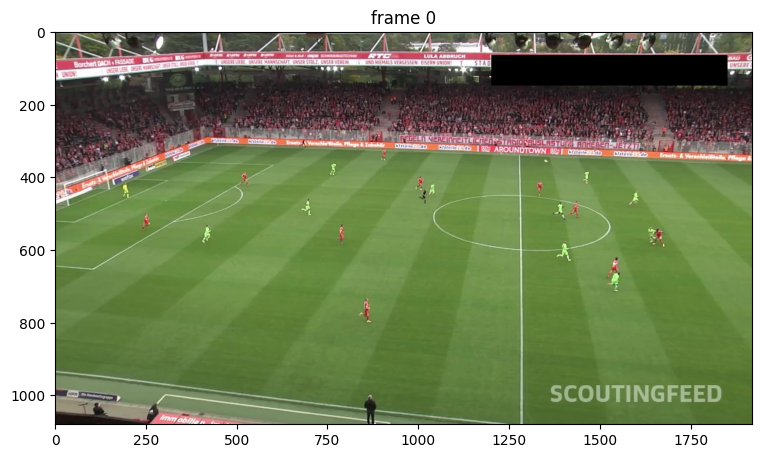

In [111]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = SOURCE_FRAMES

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
frame = Image.open(os.path.join(video_dir, frame_names[frame_idx]))
plt.imshow(frame)


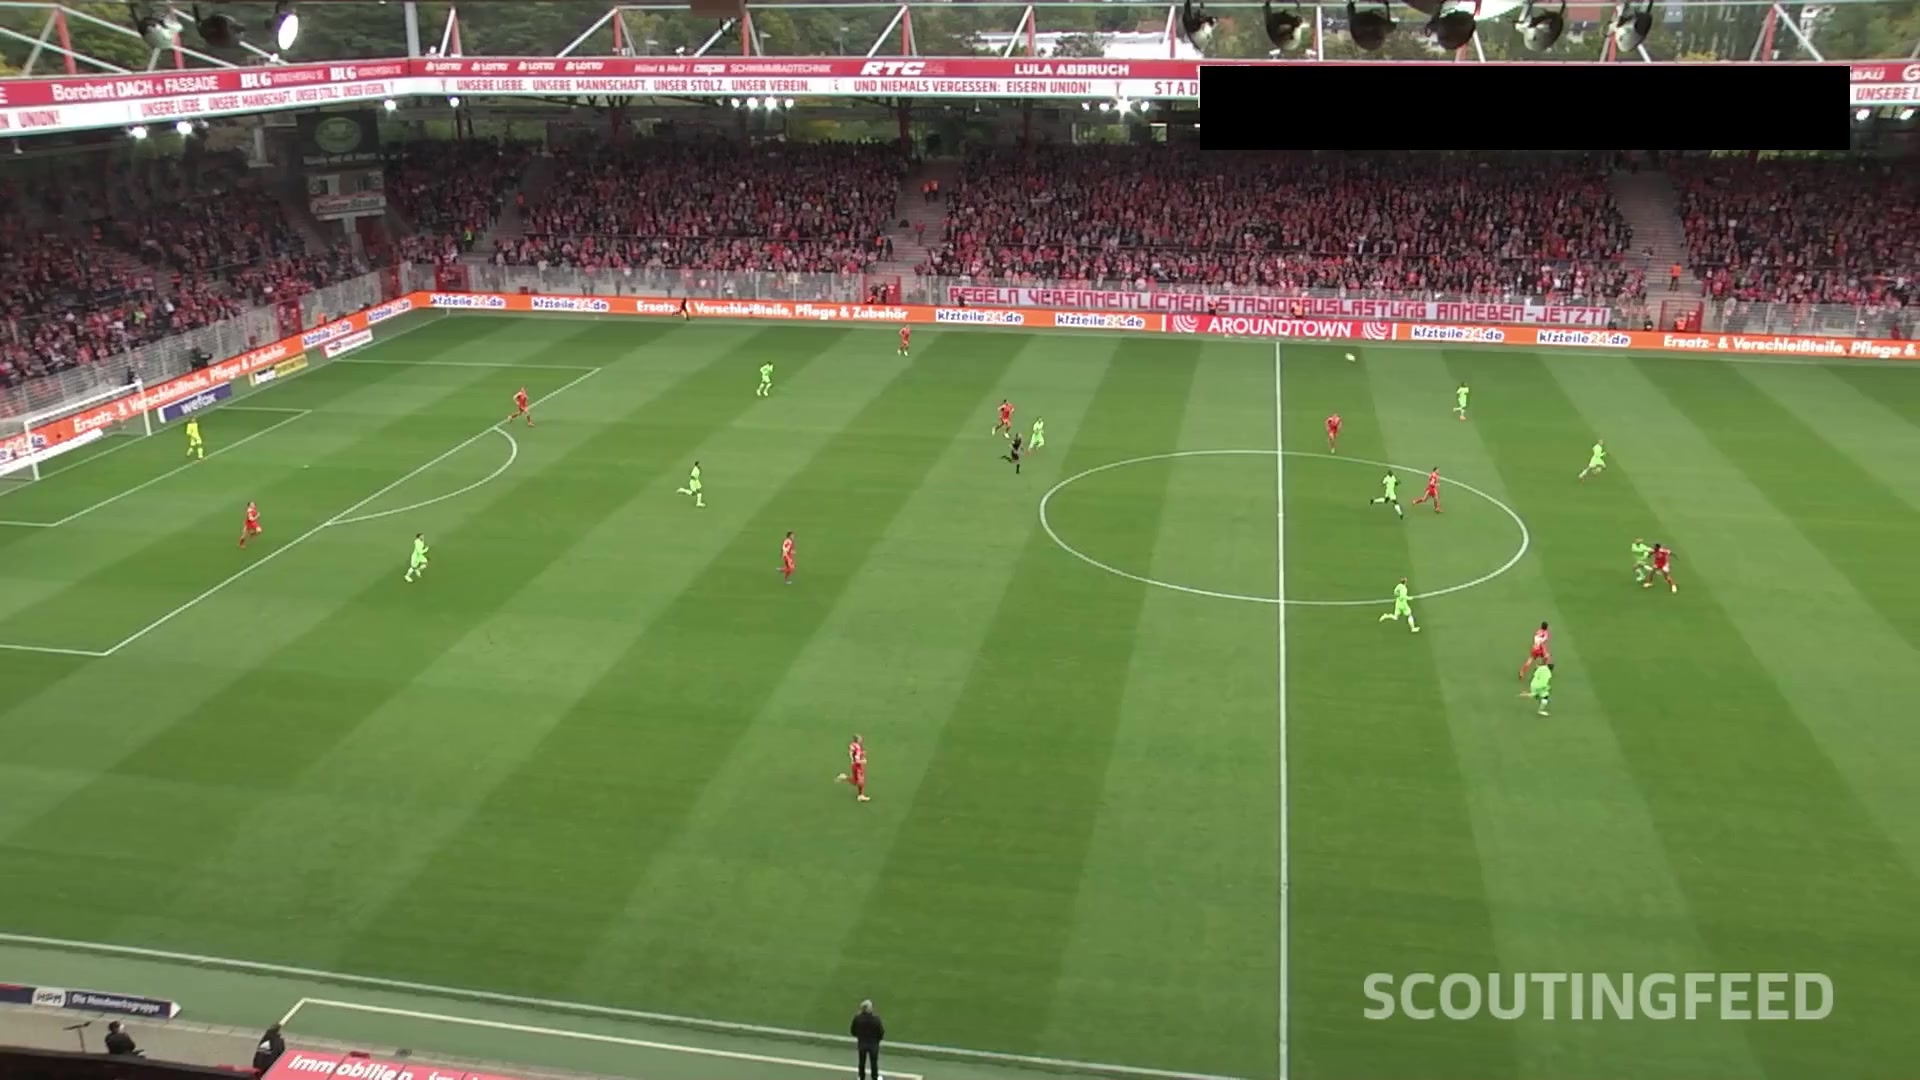

Saved Click: (859, 761, 1)
Saved Box: (832, 725, 879, 810)


In [112]:
from google.colab import output
from IPython.display import display, HTML
import io, base64
from PIL import Image
import os

# --- 1. Setup your image ---
# Ensure 'frame' is loaded. If testing, uncomment the line below:
# frame = Image.new('RGB', (400, 300), color = (73, 109, 137))

# --- 2. Initialize Storage Lists ---
clicks = []  # Renamed back to 'clicks'
boxes  = []

def on_event(event):
    # We reference the global 'clicks' list here
    global clicks, boxes

    if event["type"] == "point":
        # Save to 'clicks' list
        clicks.append((event["x"], event["y"], event["label"]))
        print(f"Saved Click: {clicks[-1]}")

    elif event["type"] == "box":
        x1, y1, x2, y2 = event["x1"], event["y1"], event["x2"], event["y2"]
        xa, xb = sorted((x1, x2))
        ya, yb = sorted((y1, y2))
        boxes.append((xa, ya, xb, yb))
        print(f"Saved Box: {boxes[-1]}")

    return "ok"

output.register_callback("notebook.on_event", on_event)

# --- 3. Prepare Image for HTML ---
buf = io.BytesIO()
frame.save(buf, format="PNG")
b64 = base64.b64encode(buf.getvalue()).decode()

# --- 4. HTML/JS Interface ---
html = f"""
<div style="position:relative; display:inline-block;">
  <img id="img" src="data:image/png;base64,{b64}"
       style="max-width:100%; cursor:crosshair;"
       ondragstart="return false;" />

  <canvas id="canvas"
          style="position:absolute; left:0; top:0; pointer-events:none;"></canvas>
</div>

<p style="font-size:12px;color:#666">
Click = point | Shift+Click = background | Drag = box
</p>

<script>
const img = document.getElementById("img");
const canvas = document.getElementById("canvas");
const ctx = canvas.getContext("2d");

let isDown = false;
let startX = 0, startY = 0;
let startDX = 0, startDY = 0;

function resizeCanvas() {{
  canvas.width  = img.clientWidth;
  canvas.height = img.clientHeight;
}}
window.addEventListener("resize", resizeCanvas);
img.addEventListener('load', resizeCanvas);
setTimeout(resizeCanvas, 100);

function toImageCoords(e) {{
  const r = img.getBoundingClientRect();
  const scaleX = img.naturalWidth / r.width;
  const scaleY = img.naturalHeight / r.height;

  const x = Math.round((e.clientX - r.left) * scaleX);
  const y = Math.round((e.clientY - r.top ) * scaleY);

  return {{x, y, dx: e.clientX - r.left, dy: e.clientY - r.top}};
}}

img.onmousedown = (e) => {{
  e.preventDefault();
  isDown = true;
  const p = toImageCoords(e);
  startX = p.x;
  startY = p.y;
  startDX = p.dx;
  startDY = p.dy;
}};

img.onmousemove = (e) => {{
  if (!isDown) return;
  e.preventDefault();

  const p = toImageCoords(e);

  ctx.clearRect(0, 0, canvas.width, canvas.height);
  ctx.strokeStyle = "lime";
  ctx.lineWidth = 2;

  ctx.strokeRect(
    startDX,
    startDY,
    p.dx - startDX,
    p.dy - startDY
  );
}};

img.onmouseup = (e) => {{
  if (!isDown) return;
  isDown = false;
  ctx.clearRect(0, 0, canvas.width, canvas.height);

  const p = toImageCoords(e);
  const dx = Math.abs(p.x - startX);
  const dy = Math.abs(p.y - startY);

  if (dx < 5 && dy < 5) {{
    const label = e.shiftKey ? 0 : 1;
    google.colab.kernel.invokeFunction(
      "notebook.on_event",
      [{{type:"point", x:p.x, y:p.y, label:label}}],
      {{}}
    );
  }} else {{
    google.colab.kernel.invokeFunction(
      "notebook.on_event",
      [{{type:"box", x1:startX, y1:startY, x2:p.x, y2:p.y}}],
      {{}}
    );
  }}
}};
</script>
"""

display(HTML(html))

In [114]:
print(clicks)
print(boxes)

[(859, 761, 1)]
[(832, 725, 879, 810)]


point_coords: [[859. 761.]]
point_labels: [1]


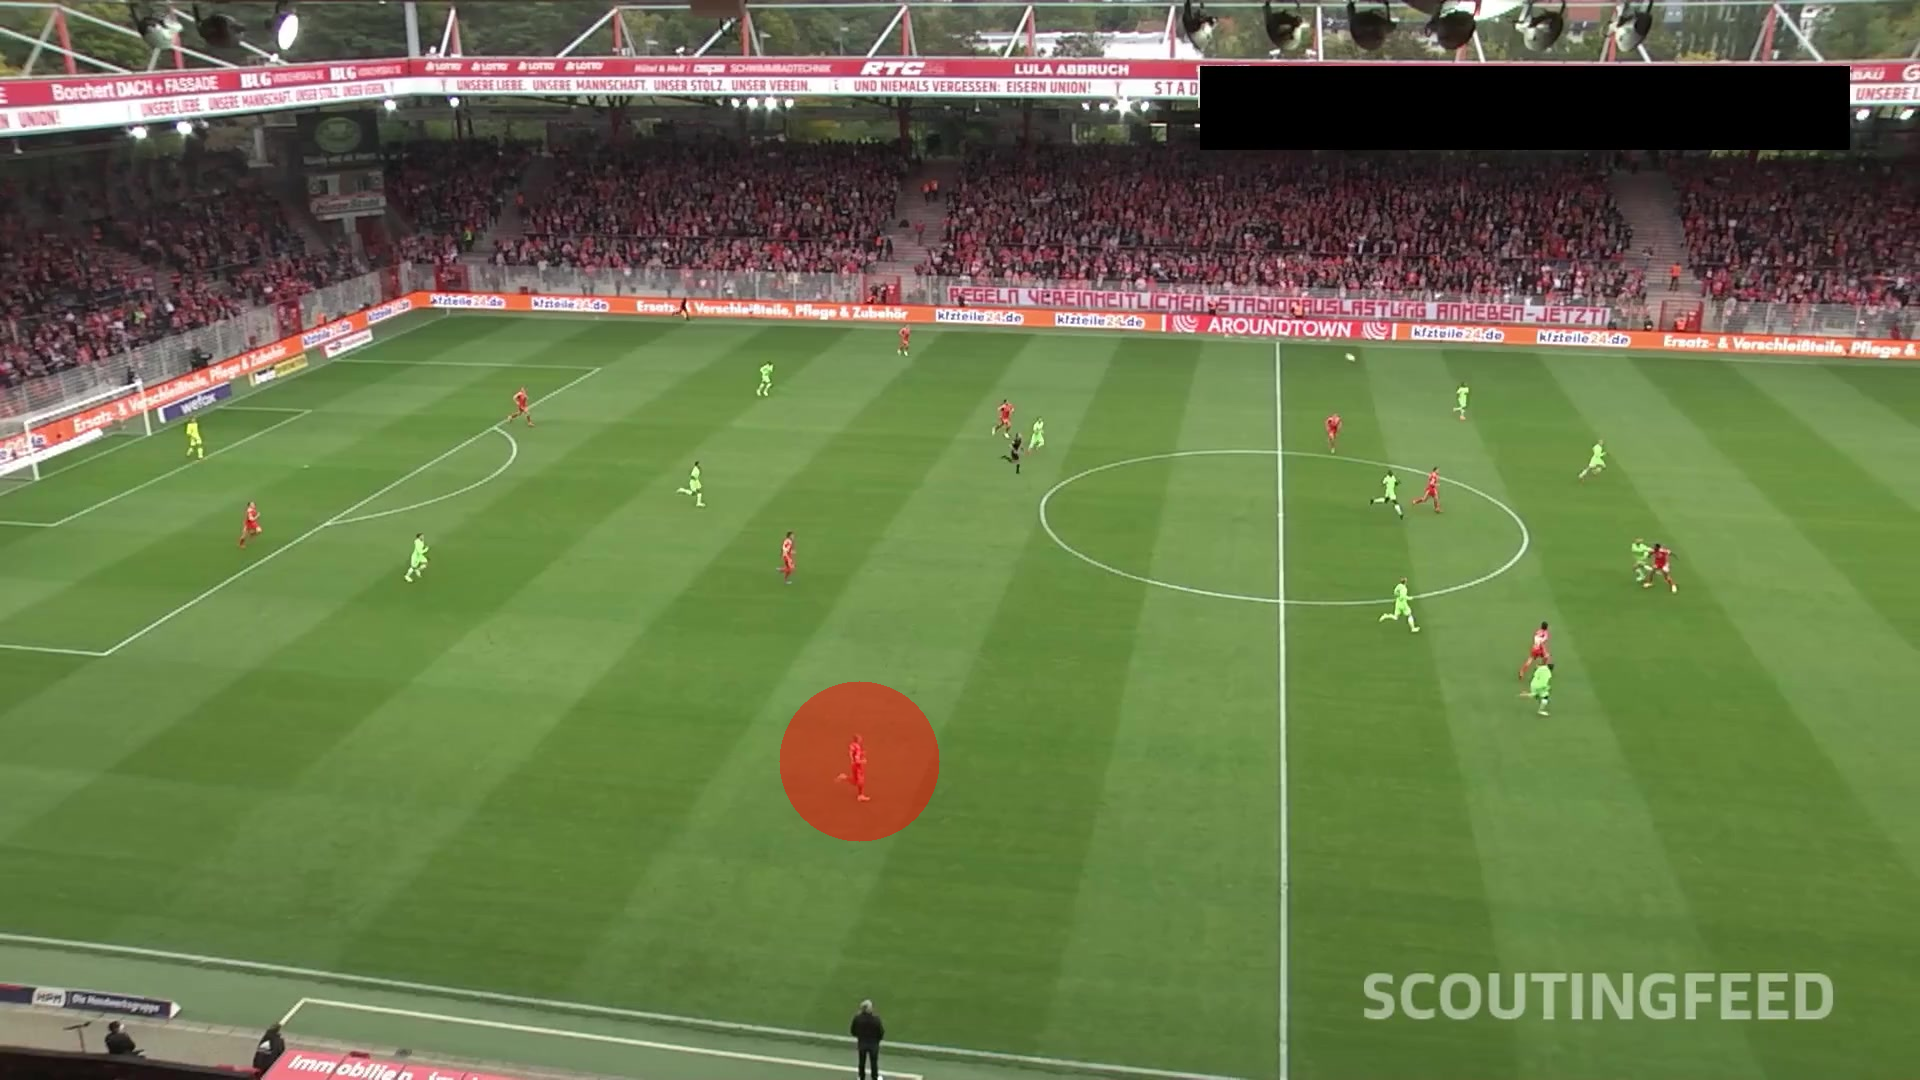

In [115]:
# Cell 2: use `clicks` to call SAM predictor and show mask overlay.
# Run this cell after you've made your clicks in Cell 1.

import numpy as np
from PIL import Image

# Example: convert clicks to numpy arrays for SAM predictor
if len(clicks) == 0:
    print("No clicks recorded. Run Cell 1 and click the image first.")
else:
    # Convert clicks to arrays: SAM expects point coords shape (N,2)
    # We'll pass coords in order [x, y] (x = column, y = row) in pixel coords.
    point_coords = np.array([[c[0], c[1]] for c in clicks], dtype=float)
    point_labels = np.array([c[2] for c in clicks], dtype=int)

    print("point_coords:", point_coords)
    print("point_labels:", point_labels)

    # -------------------------
    # Plug this into your SAM predictor.
    # Replace the following pseudo-call with your actual predictor call.
    # Example (API may vary depending on your SAM2 wrapper):
    #
    # masks, scores, logits = predictor.predict(
    #     point_coords=point_coords,
    #     point_labels=point_labels,
    #     multimask_output=False
    # )
    #
    # If your predictor requires normalized coords or reversed order, convert here.
    # -------------------------

    # --- below is a simple visualization stub to show how you'd overlay the mask ---
    # Suppose `mask` is a 2D boolean array the same HxW as the image.
    # For demonstration we'll create a fake mask centered on the first click:
    img = frame.convert("RGBA")
    W, H = img.size

    # ---- REMOVE THIS demo-mask and replace with real `mask` from SAM ----
    # Demo: circle around first click
    cx, cy = int(clicks[0][0]), int(clicks[0][1])
    demo_mask = np.zeros((H, W), dtype=bool)
    rr = 80
    yy, xx = np.ogrid[:H, :W]
    demo_mask[(yy - cy)**2 + (xx - cx)**2 <= rr*rr] = True
    mask = demo_mask
    # --------------------------------------------------------------------

    # Create RGBA overlay for mask and composite
    overlay = Image.new("RGBA", img.size, (255,0,0,0))
    overlay_data = overlay.load()
    for y in range(H):
        for x in range(W):
            if mask[y, x]:
                # semi-transparent red
                overlay_data[x,y] = (255, 0, 0, 120)
    out = Image.alpha_composite(img, overlay)
    display(out)


In [116]:
inference_state = predictor.init_state(video_path=str(video_dir))

frame loading (JPEG): 100%|██████████| 125/125 [00:07<00:00, 16.86it/s]


In [123]:
predictor.reset_state(inference_state)

In [40]:
help(predictor.add_new_points_or_box)

Help on method add_new_points_or_box in module sam2.sam2_video_predictor:

add_new_points_or_box(inference_state, frame_idx, obj_id, points=None, labels=None, clear_old_points=True, normalize_coords=True, box=None) method of sam2.sam2_video_predictor.SAM2VideoPredictorVOS instance
    Add new points to a frame.



## POINT ONLT

In [124]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

points = np.array([[x, y] for (x, y, lbl) in clicks], dtype=np.float32)
labels = np.array([lbl for (x, y, lbl) in clicks], dtype=np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)


In [119]:
points

array([[859., 761.]], dtype=float32)

In [120]:
out_mask_logits.shape

torch.Size([1, 1, 1080, 1920])

In [125]:
out_mask_logits

tensor([[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          ...,
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]]],
       device='cuda:0')

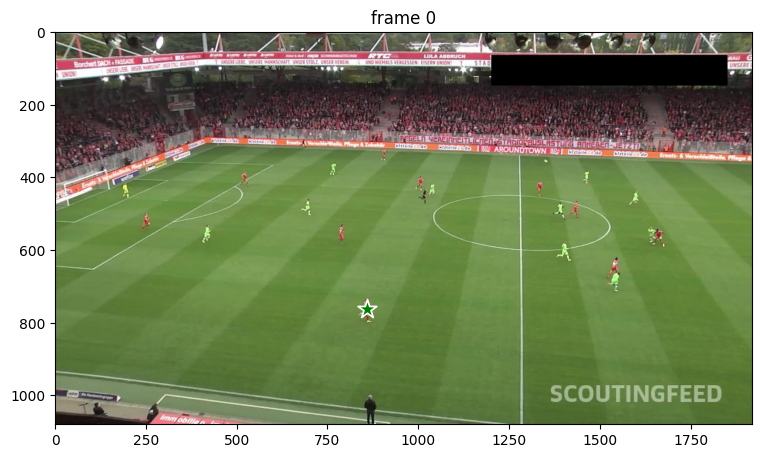

In [127]:
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
mask=(out_mask_logits[0] > 0.0).cpu().numpy()
show_mask(mask, plt.gca(), obj_id=out_obj_ids[0])

In [128]:
print(mask.shape) # (Batch , Channel , H , W)
print(frame.size)  # (W, H)

(1, 1080, 1920)
(1920, 1080)


## BOX PROMPOT

## BOX ONLY

In [130]:
predictor.reset_state(inference_state)


Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).


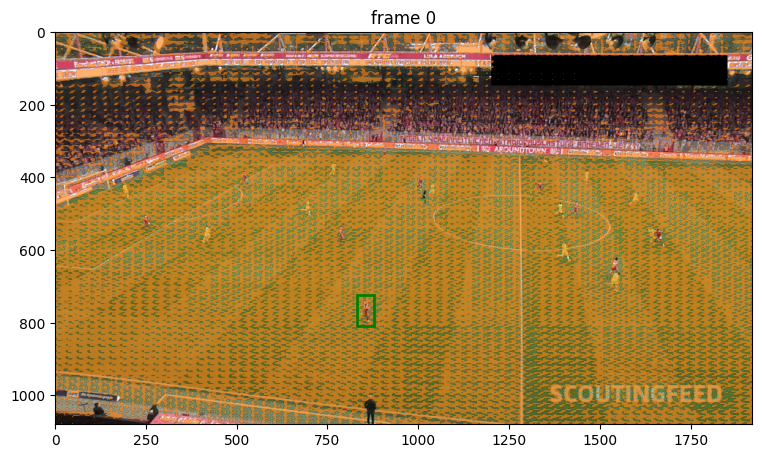

In [131]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a box at (x_min, y_min, x_max, y_max) = (300, 0, 500, 400) to get started
box = np.array([[x_min,y_min,x_max,y_max] for (x_min,y_min,x_max,y_max) in boxes], dtype=np.float32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    box=box,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_box(box[0], plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

In [132]:
out_mask_logits

tensor([[[[ 0.0241,  0.0241,  0.0241,  ..., -0.0142, -0.0142, -0.0142],
          [ 0.0241,  0.0241,  0.0241,  ..., -0.0142, -0.0142, -0.0142],
          [ 0.0231,  0.0231,  0.0231,  ..., -0.0187, -0.0187, -0.0187],
          ...,
          [-0.0231, -0.0231, -0.0231,  ...,  0.0290,  0.0290,  0.0290],
          [-0.0276, -0.0276, -0.0276,  ...,  0.0269,  0.0269,  0.0269],
          [-0.0276, -0.0276, -0.0276,  ...,  0.0269,  0.0269,  0.0269]]]],
       device='cuda:0')

## POINT + BOX

In [135]:
predictor.reset_state(inference_state)


Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).


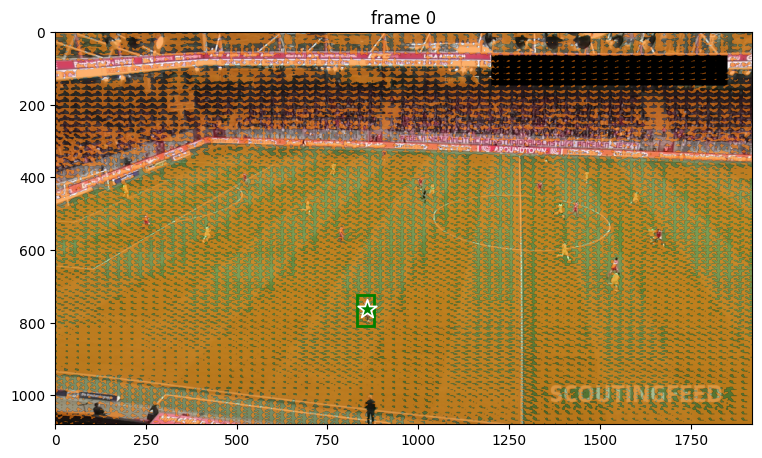

In [136]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (460, 60) to refine the mask
points = np.array([[x, y] for (x, y, lbl) in clicks], dtype=np.float32)
labels = np.array([lbl for (x, y, lbl) in clicks], dtype=np.int32)
# note that we also need to send the original box input along with
# the new refinement click together into `add_new_points_or_box`
box = np.array([[x_min,y_min,x_max,y_max] for (x_min,y_min,x_max,y_max) in boxes], dtype=np.float32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
    box=box,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_box(box[0], plt.gca())
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

## VIDEO PROPAGATION

In [ ]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {}
    for i, out_obj_id in enumerate(out_obj_ids):
        mask = (out_mask_logits[i].clone() > 0.0).cpu().numpy()
        video_segments[out_frame_idx][out_obj_id] = mask

# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)